In [1]:
import os
import shutil
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pathlib
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator



Data Preprocessing



In [7]:
## Bu hücreyi projenin en başında sadece bir kere çalıştırdım.
## Yangın resimlerinden kaç adet var onu gösteriyor.
klasor_yolu = '/content/drive/MyDrive/Yangın/yangın/fire_images'  # Kullanmak istediğiniz klasörün yolunu belirtin
dosyalar = os.listdir(klasor_yolu)

# Sadece resim dosyalarını seç (örneğin, .jpg, .jpeg, .png uzantılı dosyalar)
resim_dosyalari = [dosya for dosya in dosyalar if dosya.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Resim dosyalarının sayısını ekrana yazdır
resim_sayisi = len(resim_dosyalari)

print(f" yangın Klasördeki resim sayısı: {resim_sayisi}")




 yangın Klasördeki resim sayısı: 755


In [8]:
##yangın olmayan  resimlerinden kaç adet var ona bakacağım.
dosyalar = os.listdir(klasor_yolu)
resim_dosyalari = [dosya for dosya in dosyalar if dosya.lower().endswith(('.jpg', '.jpeg', '.png'))]
resim_sayisi = len(resim_dosyalari)
print(f" yangın olmayan  Klasördeki resim sayısı: {resim_sayisi}")


 yangın olmayan  Klasördeki resim sayısı: 244


In [44]:

## Toplam 999 adet resim var.Şimdi bir train bir de test dosyası oluşturacağız.. 70/30 oran olacak.
##önce non_images klasörünü 30/70 ayıracağız ve bunu test içinde non_images kısmına atacağız.
#burası train klasöründeki yangın_olmayan klasörü için yapılacak.

kaynak_klasoru = '/content/drive/MyDrive/Yangın/yangın/yangın_olmayan_resimler'  # Resimlerin bulunduğu klasörün yolu
hedef_klasoru = '/content/drive/MyDrive/Yangın/yangın/Train/yangın_olmayan'    # Resimlerin taşınacağı klasörün yolu

# Kaynak klasördeki tüm dosyaları listele
dosyalar = os.listdir(kaynak_klasoru)

# Sadece resim dosyalarını seç (örneğin, .jpg, .jpeg, .png uzantılı dosyalar)
resim_dosyalari = [dosya for dosya in dosyalar if dosya.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Random olarak %70'ini seç
secilen_resimler = random.sample(resim_dosyalari, int(0.7 * len(resim_dosyalari)))

# Hedef klasörü oluştur (eğer yoksa)
if not os.path.exists(hedef_klasoru):
    os.makedirs(hedef_klasoru)

# Resimleri hedef klasöre taşı
for resim in secilen_resimler:
    kaynak_yol = os.path.join(kaynak_klasoru, resim)
    hedef_yol = os.path.join(hedef_klasoru, resim)
    shutil.move(kaynak_yol, hedef_yol)

print(f"{len(secilen_resimler)} resim, {hedef_klasoru} klasörüne başarıyla taşındı.")


170 resim, /content/drive/MyDrive/Yangın/yangın/Train/yangın_olmayan klasörüne başarıyla taşındı.


In [45]:

##Burada test klasöründeki yangın olmayan kısıma resimleri ekledik.

kaynak_klasoru = '/content/drive/MyDrive/Yangın/yangın/yangın_olmayan_resimler'  # Resimlerin bulunduğu klasörün yolu
hedef_klasoru = '/content/drive/MyDrive/Yangın/yangın/Test/yangın_olmayan'    # Resimlerin taşınacağı klasörün yolu

# Kaynak klasördeki tüm dosyaları listele
dosyalar = os.listdir(kaynak_klasoru)

# Sadece resim dosyalarını seç (örneğin, .jpg, .jpeg, .png uzantılı dosyalar)
resim_dosyalari = [dosya for dosya in dosyalar if dosya.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Hedef klasörü oluştur (eğer yoksa)
if not os.path.exists(hedef_klasoru):
    os.makedirs(hedef_klasoru)

# Resimleri hedef klasöre taşı
for resim in resim_dosyalari:
    kaynak_yol = os.path.join(kaynak_klasoru, resim)
    hedef_yol = os.path.join(hedef_klasoru, resim)
    shutil.move(kaynak_yol, hedef_yol)

print(f"Tüm resimler, {hedef_klasoru} klasörüne başarıyla taşındı.")


Tüm resimler, /content/drive/MyDrive/Yangın/yangın/Test/yangın_olmayan klasörüne başarıyla taşındı.


In [46]:

##burada yangın resimlerini train klasöründe taşıyacagım.
kaynak_klasoru = '/content/drive/MyDrive/Yangın/yangın/yangın_resimleri'  # Resimlerin bulunduğu klasörün yolu
hedef_klasoru = '/content/drive/MyDrive/Yangın/yangın/Train/yangın'    # Resimlerin taşınacağı klasörün yolu

# Kaynak klasördeki tüm dosyaları listele
dosyalar = os.listdir(kaynak_klasoru)

# Sadece resim dosyalarını seç (örneğin, .jpg, .jpeg, .png uzantılı dosyalar)
resim_dosyalari = [dosya for dosya in dosyalar if dosya.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Random olarak %70'ini seç
secilen_resimler = random.sample(resim_dosyalari, int(0.7 * len(resim_dosyalari)))

# Hedef klasörü oluştur (eğer yoksa)
if not os.path.exists(hedef_klasoru):
    os.makedirs(hedef_klasoru)

# Resimleri hedef klasöre taşı
for resim in secilen_resimler:
    kaynak_yol = os.path.join(kaynak_klasoru, resim)
    hedef_yol = os.path.join(hedef_klasoru, resim)
    shutil.move(kaynak_yol, hedef_yol)

print(f"{len(secilen_resimler)} resim, {hedef_klasoru} klasörüne başarıyla taşındı.")

528 resim, /content/drive/MyDrive/Yangın/yangın/Train/yangın klasörüne başarıyla taşındı.


In [47]:

##burada test klasöründeki yangın resimlerini taşıma yapıcaz
kaynak_klasoru = '/content/drive/MyDrive/Yangın/yangın/yangın_resimleri'  # Resimlerin bulunduğu klasörün yolu
hedef_klasoru = '/content/drive/MyDrive/Yangın/yangın/Test/yangın'    # Resimlerin taşınacağı klasörün yolu

# Kaynak klasördeki tüm dosyaları listele
dosyalar = os.listdir(kaynak_klasoru)

# Sadece resim dosyalarını seç (örneğin, .jpg, .jpeg, .png uzantılı dosyalar)
resim_dosyalari = [dosya for dosya in dosyalar if dosya.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Hedef klasörü oluştur (eğer yoksa)
if not os.path.exists(hedef_klasoru):
    os.makedirs(hedef_klasoru)

# Resimleri hedef klasöre taşı
for resim in resim_dosyalari:
    kaynak_yol = os.path.join(kaynak_klasoru, resim)
    hedef_yol = os.path.join(hedef_klasoru, resim)
    shutil.move(kaynak_yol, hedef_yol)

print(f"Tüm resimler, {hedef_klasoru} klasörüne başarıyla taşındı.")

Tüm resimler, /content/drive/MyDrive/Yangın/yangın/Test/yangın klasörüne başarıyla taşındı.


In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
## Random bir resimi görüntülemek istedim.
def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (804, 1280, 3)


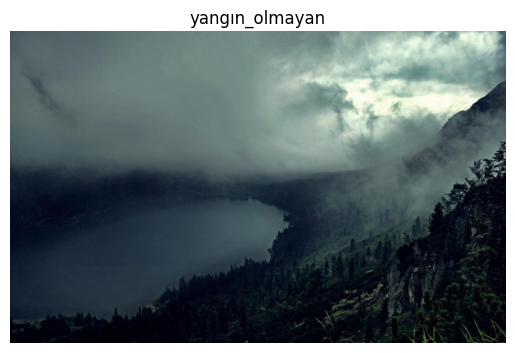

In [4]:
img = view_random_image(target_dir="/content/drive/MyDrive/Yangın/yangın/Test/",
                        target_class="yangın_olmayan")

Model Kurma ve tahmin ettirme işlemleri.

In [2]:
# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "/content/drive/MyDrive/Yangın/yangın/Train"
test_dir = "/content/drive/MyDrive/Yangın/yangın/Test"

In [6]:
# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=7)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=7
                                              )

Found 698 images belonging to 2 classes.
Found 301 images belonging to 2 classes.


In [7]:
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224,224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])


In [8]:
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
22/22 [==============================] - 17s 623ms/step - loss: 0.4283 - accuracy: 0.8109 - val_loss: 0.1655 - val_accuracy: 0.9336
Epoch 2/5
22/22 [==============================] - 13s 607ms/step - loss: 0.2270 - accuracy: 0.9112 - val_loss: 0.1822 - val_accuracy: 0.9203
Epoch 3/5
22/22 [==============================] - 16s 721ms/step - loss: 0.1420 - accuracy: 0.9370 - val_loss: 0.0990 - val_accuracy: 0.9568
Epoch 4/5
22/22 [==============================] - 14s 630ms/step - loss: 0.1365 - accuracy: 0.9413 - val_loss: 0.1008 - val_accuracy: 0.9601
Epoch 5/5
22/22 [==============================] - 14s 630ms/step - loss: 0.1235 - accuracy: 0.9499 - val_loss: 0.0920 - val_accuracy: 0.9701


In [9]:
#Modelin loss ve accuracy grafiğini çizdirdim.
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

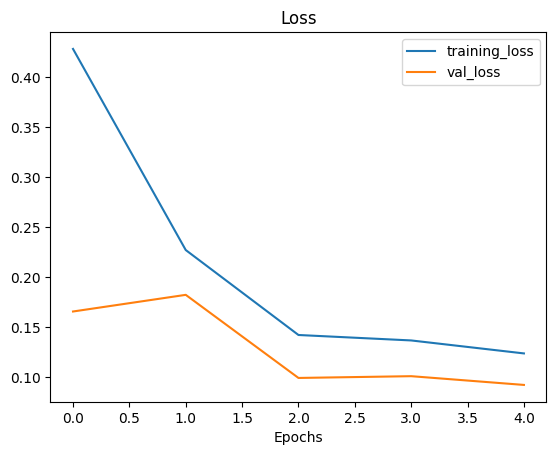

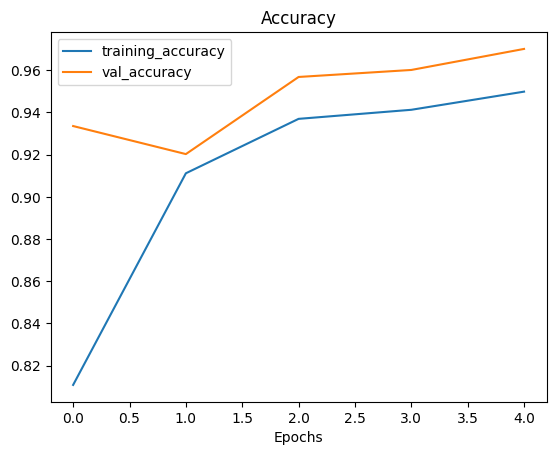

In [10]:
plot_loss_curves(history_1)

In [11]:
##Tahmin etme aşaması
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [12]:
yangın_olmayan = load_and_prep_image("/content/drive/MyDrive/Yangın/yangın/Train/yangın_olmayan/non_fire.107.jpg")
yangın_olmayan

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.49025205, 0.56473243, 0.3297741 ],
        [0.6287937 , 0.6697688 , 0.4380374 ],
        [0.85343987, 0.87321407, 0.74936575],
        ...,
        [0.2840522 , 0.4314514 , 0.02304037],
        [0.29451406, 0.40431798, 0.06314149],
        [0.2374742 , 0.34727812, 0.01025029]],

       [[0.42708802, 0.4889753 , 0.3228729 ],
        [0.50524396, 0.53824466, 0.35197893],
        [0.6400901 , 0.6598465 , 0.5337207 ],
        ...,
        [0.38181892, 0.5106704 , 0.15510891],
        [0.42119417, 0.53099805, 0.19780481],
        [0.34341654, 0.4532205 , 0.12002721]],

       [[0.5562638 , 0.61031574, 0.4702344 ],
        [0.48187122, 0.5098971 , 0.35092443],
        [0.6308474 , 0.6433515 , 0.5448396 ],
        ...,
        [0.22292246, 0.324379  , 0.02068155],
        [0.19727433, 0.30707824, 0.00596632],
        [0.26564923, 0.37545314, 0.05962506]],

       ...,

       [[0.52767986, 0.47893983, 0.21799877],
        [0.52

In [13]:
print(f"Shape before new dimension: {yangın_olmayan.shape}")
yangın_olmayan= tf.expand_dims(yangın_olmayan, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {yangın_olmayan.shape}")
yangın_olmayan

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.49025205, 0.56473243, 0.3297741 ],
         [0.6287937 , 0.6697688 , 0.4380374 ],
         [0.85343987, 0.87321407, 0.74936575],
         ...,
         [0.2840522 , 0.4314514 , 0.02304037],
         [0.29451406, 0.40431798, 0.06314149],
         [0.2374742 , 0.34727812, 0.01025029]],

        [[0.42708802, 0.4889753 , 0.3228729 ],
         [0.50524396, 0.53824466, 0.35197893],
         [0.6400901 , 0.6598465 , 0.5337207 ],
         ...,
         [0.38181892, 0.5106704 , 0.15510891],
         [0.42119417, 0.53099805, 0.19780481],
         [0.34341654, 0.4532205 , 0.12002721]],

        [[0.5562638 , 0.61031574, 0.4702344 ],
         [0.48187122, 0.5098971 , 0.35092443],
         [0.6308474 , 0.6433515 , 0.5448396 ],
         ...,
         [0.22292246, 0.324379  , 0.02068155],
         [0.19727433, 0.30707824, 0.00596632],
         [0.26564923, 0.37545314, 0.05962506]],

        ...,

        [[0.52767986, 0.47893983, 

In [14]:
pred = model_1.predict(yangın_olmayan)
pred

1/1 [==============================] - 0s 302ms/step


array([[0.9966536]], dtype=float32)

In [17]:
data_direct = pathlib.Path("/content/drive/MyDrive/Yangın/yangın/Train") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_direct.glob('*')]))
class_names


array(['yangın', 'yangın_olmayan'], dtype='<U14')

In [18]:
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'yangın_olmayan'

In [19]:
##Tahmin etme işleminin fonksiyonu
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 18ms/step


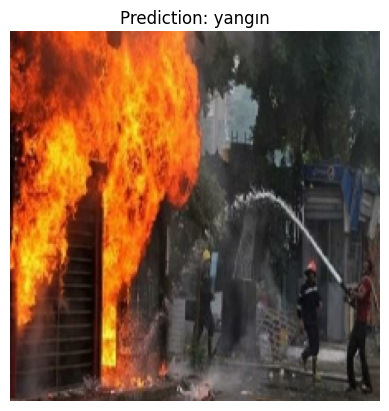

In [22]:
pred_and_plot(model_1, "/content/drive/MyDrive/Yangın/yangın/Train/yangın/fire.134.jpg", class_names)

In [26]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                 

In [23]:
model_1.save("fire_detector_model") ##burada modelimizi kaydettik.


In [24]:
loaded_model_1 = tf.keras.models.load_model("fire_detector_model") ##burada kaydettiğimiz modeli kaydetip kullandık.
#bu sekilde cağırıyoruz.
loaded_model_1.evaluate(valid_data)



10/10 [==============================] - 4s 373ms/step - loss: 0.0920 - accuracy: 0.9701


[0.09201543778181076, 0.970099687576294]

In [25]:
model_1.evaluate(valid_data) #gerçek modelimizi kaydedilen model ile karşılaştırdık.

10/10 [==============================] - 4s 348ms/step - loss: 0.0920 - accuracy: 0.9701


[0.09201543778181076, 0.970099687576294]